In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
df = pd.read_csv('Bujaka/PM10_Bujaka.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df = df[df.index.year >= 2019]

In [4]:
display(df)

,MpKrakBujaka
data,
2019-01-01,23.42
2019-01-02,10.56
2019-01-03,13.90
2019-01-04,27.16
2019-01-05,17.91
...,...
2023-12-27,26.03
2023-12-28,56.96
2023-12-29,22.40


In [5]:
df.isnull().sum()

MpKrakBujaka    14
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,MpKrakBujaka
data,
2019-11-28,NaN
2020-01-08,NaN
2020-05-11,NaN
2020-12-06,NaN
2021-05-29,NaN
2021-05-30,NaN
2022-10-21,NaN
2022-10-22,NaN
2022-10-23,NaN


In [7]:
df_filled = df.interpolate()

In [8]:
df_filled.describe()

,MpKrakBujaka
count,1826.000000
mean,29.746443
std,19.010967
min,5.150000
25%,17.415000
50%,24.340000
75%,35.060000
max,182.680000


In [9]:
weather = pd.read_csv('pogoda19-23.csv', sep=';', index_col=0)

In [10]:
display(weather)

,averagePm10,averageAirTemp,averageAirPressure,averageWindDirection,maxWindSpeed,averageWindSpeed,rainIntensity
time,,,,,,,
2019-01-01 23:00:00,7.174444,0.857361,984.978958,288.0,9.1,3.858889,0.0
2019-01-02 23:00:00,8.947083,-2.256389,994.994514,304.0,6.9,2.833889,0.0
2019-01-03 23:00:00,26.106042,-2.844167,997.635694,268.0,6.7,2.609306,0.0
2019-01-04 23:00:00,15.644545,0.915972,986.117569,278.0,6.2,2.523681,0.0
2019-01-05 23:00:00,9.742738,-2.588264,993.800139,352.0,7.0,2.296389,0.0
...,...,...,...,...,...,...,...
2023-12-26 23:00:00,NaN,NaN,NaN,26.0,3.9,0.849444,0.0
2023-12-27 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-12-28 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
print((weather.isnull().sum() / weather.shape[0] * 100).round(2))

averagePm10             0.39
averageAirTemp          0.28
averageAirPressure      0.28
averageWindDirection    0.22
maxWindSpeed            0.22
averageWindSpeed        0.22
rainIntensity           0.00
dtype: float64


In [12]:
weather = weather.interpolate()
weather.index = pd.to_datetime(weather.index)
weather.index = weather.index.normalize()

In [13]:
weather.isnull().sum()

averagePm10             0
averageAirTemp          0
averageAirPressure      0
averageWindDirection    0
maxWindSpeed            0
averageWindSpeed        0
rainIntensity           0
dtype: int64

In [14]:
data = pd.concat([weather, df_filled], axis=1)

In [15]:
display(df_filled)

,MpKrakBujaka
data,
2019-01-01,23.42
2019-01-02,10.56
2019-01-03,13.90
2019-01-04,27.16
2019-01-05,17.91
...,...
2023-12-27,26.03
2023-12-28,56.96
2023-12-29,22.40


In [16]:
display(data)
# direction?

,averagePm10,averageAirTemp,averageAirPressure,averageWindDirection,maxWindSpeed,averageWindSpeed,rainIntensity,MpKrakBujaka
2019-01-01,7.174444,0.857361,984.978958,288.0,9.1,3.858889,0.0,23.42
2019-01-02,8.947083,-2.256389,994.994514,304.0,6.9,2.833889,0.0,10.56
2019-01-03,26.106042,-2.844167,997.635694,268.0,6.7,2.609306,0.0,13.90
2019-01-04,15.644545,0.915972,986.117569,278.0,6.2,2.523681,0.0,27.16
2019-01-05,9.742738,-2.588264,993.800139,352.0,7.0,2.296389,0.0,17.91
...,...,...,...,...,...,...,...,...
2023-12-27,22.347292,4.344861,985.503958,26.0,3.9,0.849444,0.0,26.03
2023-12-28,22.347292,4.344861,985.503958,26.0,3.9,0.849444,0.0,56.96
2023-12-29,22.347292,4.344861,985.503958,26.0,3.9,0.849444,0.0,22.40
2023-12-30,22.347292,4.344861,985.503958,26.0,3.9,0.849444,0.0,11.93


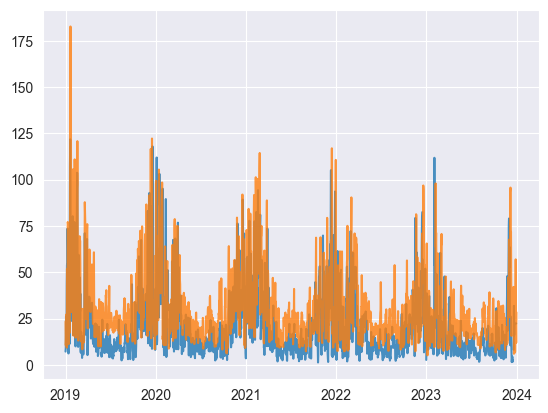

In [17]:
fig, ax = plt.subplots()
ax.plot(data[['averagePm10', 'MpKrakBujaka']], alpha=0.8)
plt.show()

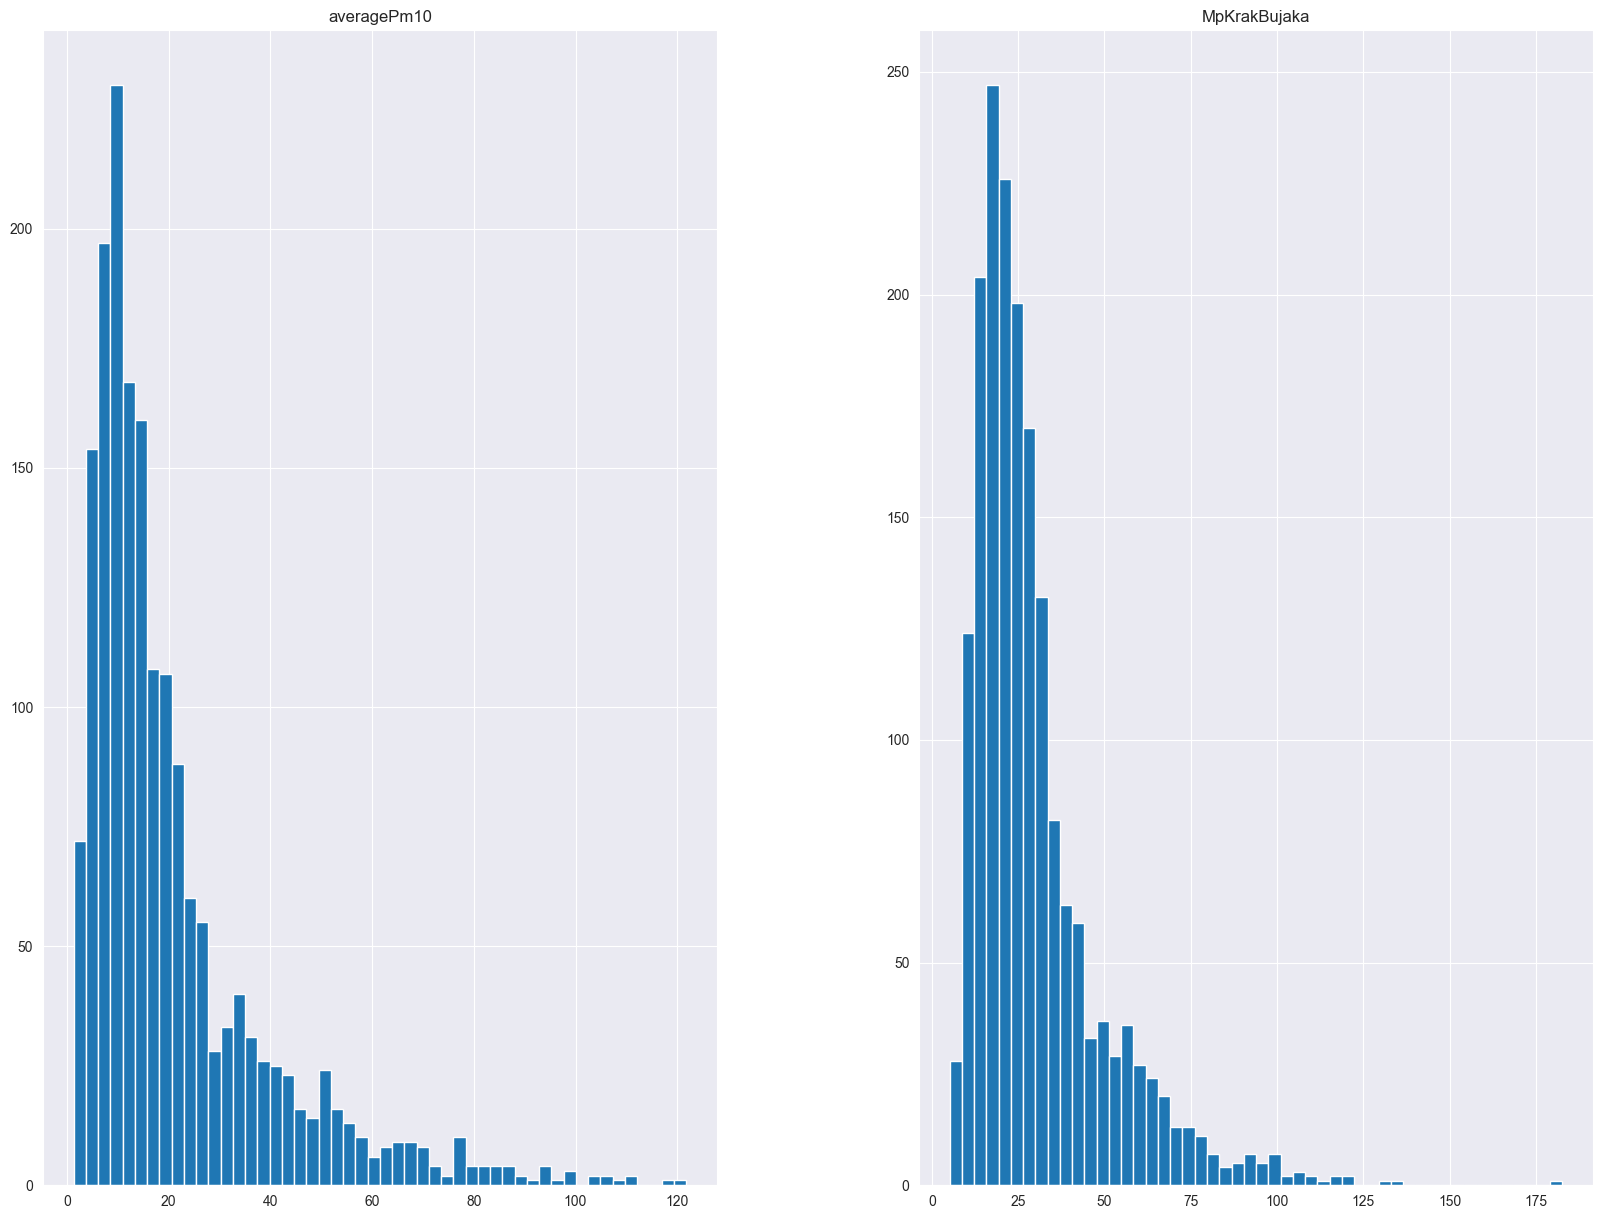

In [18]:
data[['averagePm10', 'MpKrakBujaka']].hist(bins=50, figsize=(20,15))
plt.show()

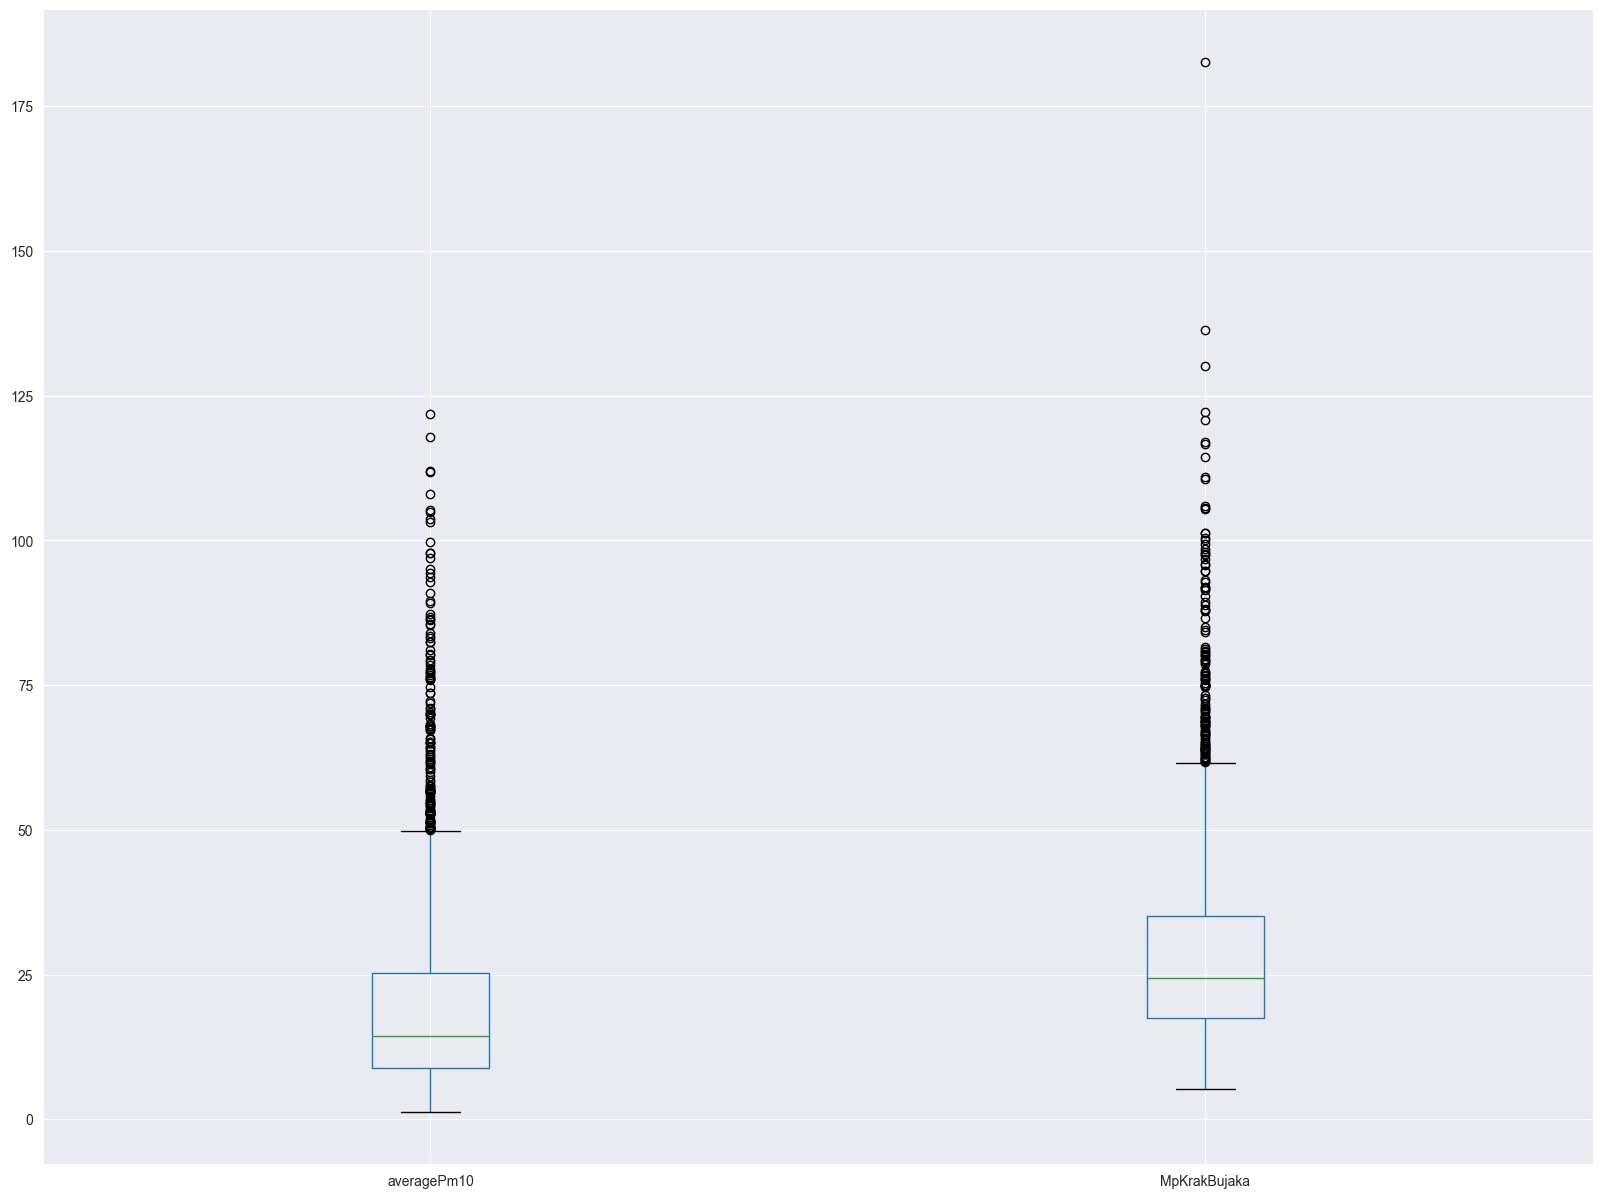

In [19]:
data[['averagePm10', 'MpKrakBujaka']].boxplot(figsize=(20,15))
plt.show()
# wouldn't remove outliners

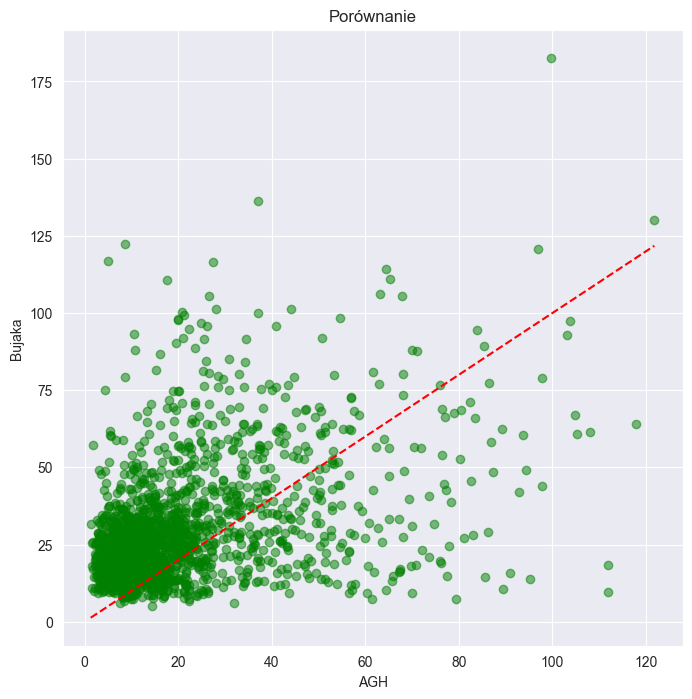

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(data['averagePm10'], data['MpKrakBujaka'], alpha=0.5, color='green')
plt.plot([data['averagePm10'].min(), data['averagePm10'].max()], [data['averagePm10'].min(), data['averagePm10'].max()], 'r--')  # Linia y=x
plt.xlabel('AGH')
plt.ylabel('Bujaka')
plt.title('Porównanie')
plt.grid(True)
plt.show()


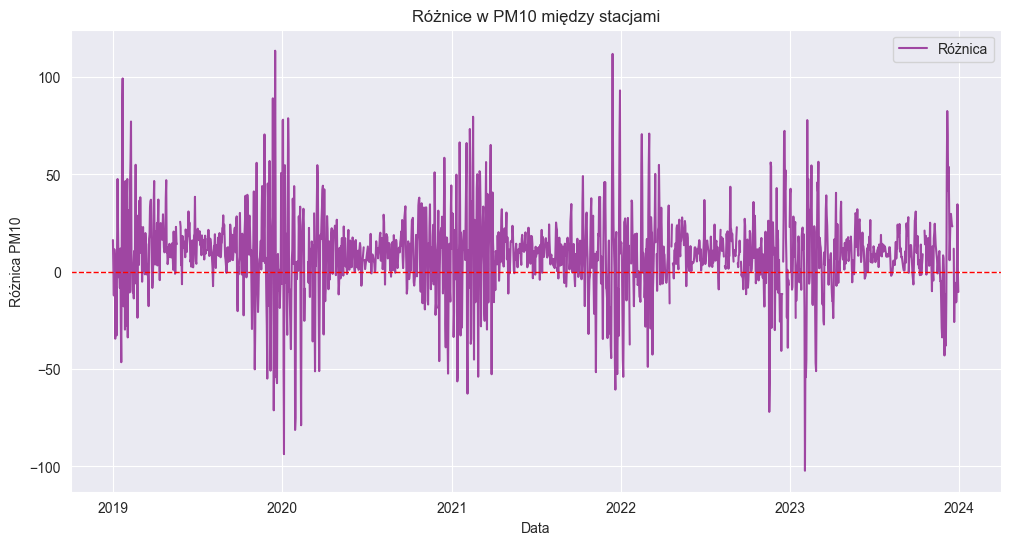

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MpKrakBujaka'] - data['averagePm10'], label='Różnica', color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1) 
plt.xlabel('Data')
plt.ylabel('Różnica PM10')
plt.title('Różnice w PM10 między stacjami')
plt.legend()
plt.grid(True)
plt.show()


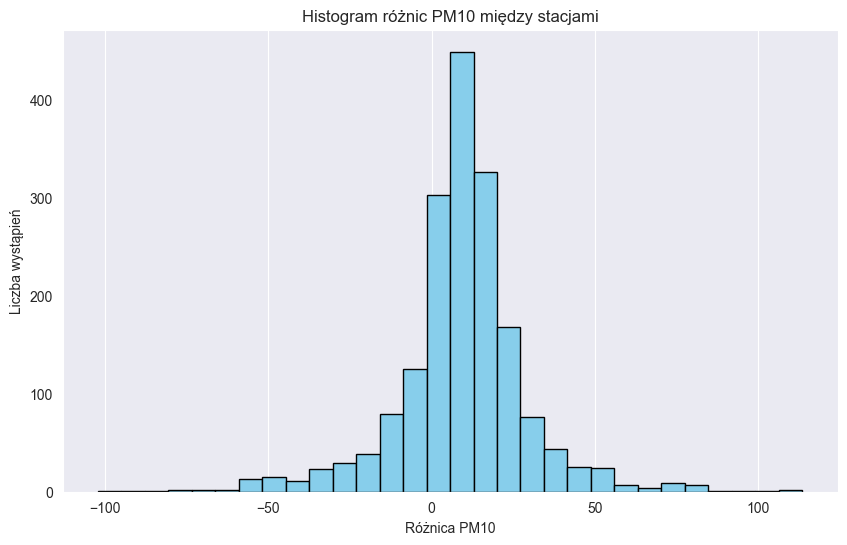

In [22]:
plt.figure(figsize=(10, 6))
# usually Bujaka >
plt.hist(data['MpKrakBujaka'] - data['averagePm10'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Różnica PM10')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram różnic PM10 między stacjami')
plt.grid(axis='y')
plt.show()

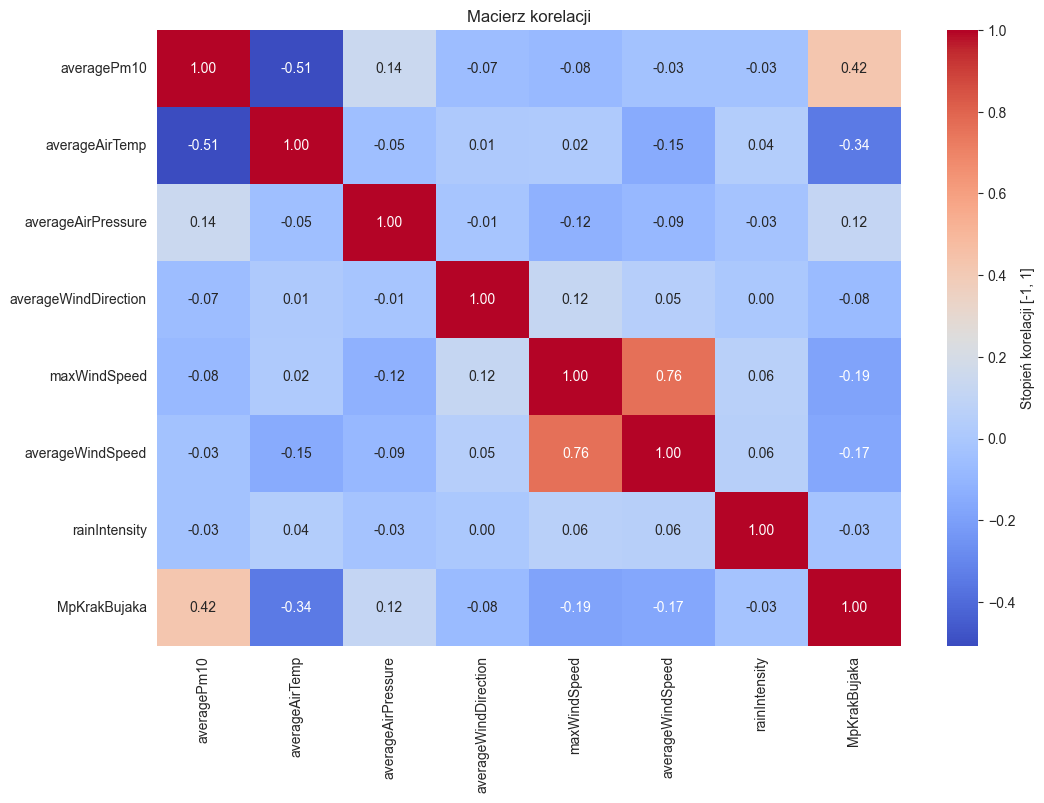

In [23]:
correlation = data.dropna().corr()
#correlation_abs = 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Stopień korelacji [-1, 1]'})
#sns.heatmap(correlation_abs, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Stopień korelacji [-1, 1]'})

plt.title('Macierz korelacji')
plt.show()

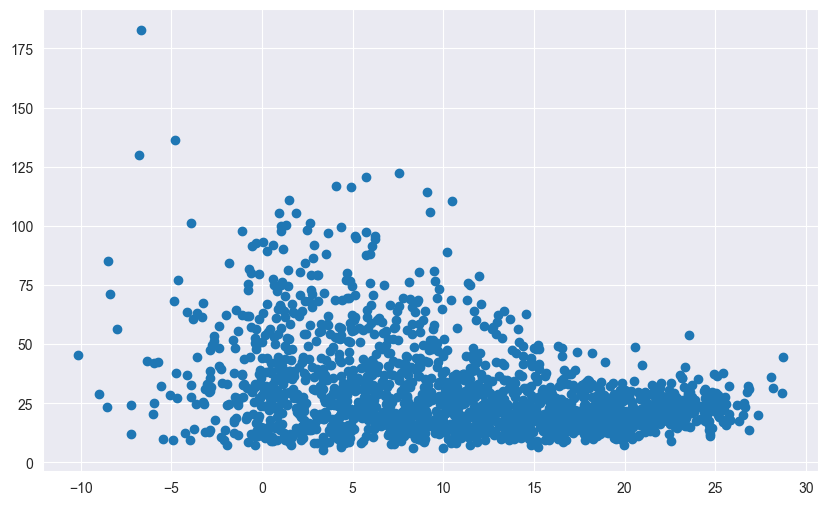

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data['averageAirTemp'], data['MpKrakBujaka'])
plt.show()

In [25]:
# extreme temperature =/= extreme pollution
# depens on the day of the week, holidays

In [26]:
data['weekday'] = data.index.day_name()

In [27]:
data.groupby('weekday').mean()

,averagePm10,averageAirTemp,averageAirPressure,averageWindDirection,maxWindSpeed,averageWindSpeed,rainIntensity,MpKrakBujaka
weekday,,,,,,,,
Friday,21.741673,10.904057,989.380598,211.846774,5.542742,1.682399,0.096774,30.599489
Monday,19.269743,10.561897,989.498131,215.521739,5.527668,1.683555,0.023320,29.830885
Saturday,22.314528,10.796696,989.420811,224.074219,5.643359,1.621600,0.070312,27.216335
Sunday,20.873683,10.653755,989.267889,221.251938,5.586047,1.689989,0.051938,26.020057
Thursday,22.307257,10.904461,988.112255,210.276923,5.746154,1.686312,0.008846,32.397625
Tuesday,18.532591,10.978971,989.223424,226.454902,5.316078,1.612650,0.012549,30.923244
Wednesday,19.890918,11.034455,989.023809,222.615385,5.503077,1.652970,0.118462,31.237791


In [29]:
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    residuals = y_test - y_pred
    return mae, mse, r2, residuals, y_pred

In [30]:
results = pd.DataFrame(columns=['Variable', 'MAE', 'MSE', 'R2', 'residuals', 'y_pred'])
resultsB = pd.DataFrame(columns=['Variable', 'MAE', 'MSE', 'R2', 'residuals', 'y_pred'])

In [31]:
data[data.isnull().any(axis=1)]


,averagePm10,averageAirTemp,averageAirPressure,averageWindDirection,maxWindSpeed,averageWindSpeed,rainIntensity,MpKrakBujaka,weekday
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.59,Monday
2019-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.39,Tuesday
2019-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.24,Wednesday
2019-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.53,Friday
2019-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.99,Saturday
2019-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.17,Monday
2019-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.37,Tuesday
2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.28,Thursday
2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.26,Friday
2020-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,Saturday


In [33]:
data = data.interpolate()

C:\Users\PC\AppData\Local\Temp\ipykernel_17928\958036577.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()


In [35]:
for var in data.drop('weekday', axis=1).columns:
    X = data[[var]]

    y_pm10 = data['averagePm10'].values
    mae, mse, r2, residuals, y_pred = train_and_evaluate(X, y_pm10)
    results = pd.concat([results, pd.DataFrame({'Variable': [var], 'MAE': [mae], 'MSE': [mse], 'R2': [r2], 'residuals': [residuals], 'y_pred': [y_pred]})], ignore_index=True)

    y_bujaka = data['MpKrakBujaka'].values
    mae, mse, r2, residuals, y_pred = train_and_evaluate(X, y_bujaka)
    resultsB = pd.concat([resultsB, pd.DataFrame({'Variable': [var], 'MAE': [mae], 'MSE': [mse], 'R2': [r2], 'residuals': [residuals], 'y_pred': [y_pred]})], ignore_index=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17928\2439443345.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Variable': [var], 'MAE': [mae], 'MSE': [mse], 'R2': [r2], 'residuals': [residuals], 'y_pred': [y_pred]})], ignore_index=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_17928\2439443345.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultsB = pd.concat([resultsB, pd.DataFrame({'Variable': [var], 'MAE': [mae], 'MSE': [mse], 'R2': [r2], 're

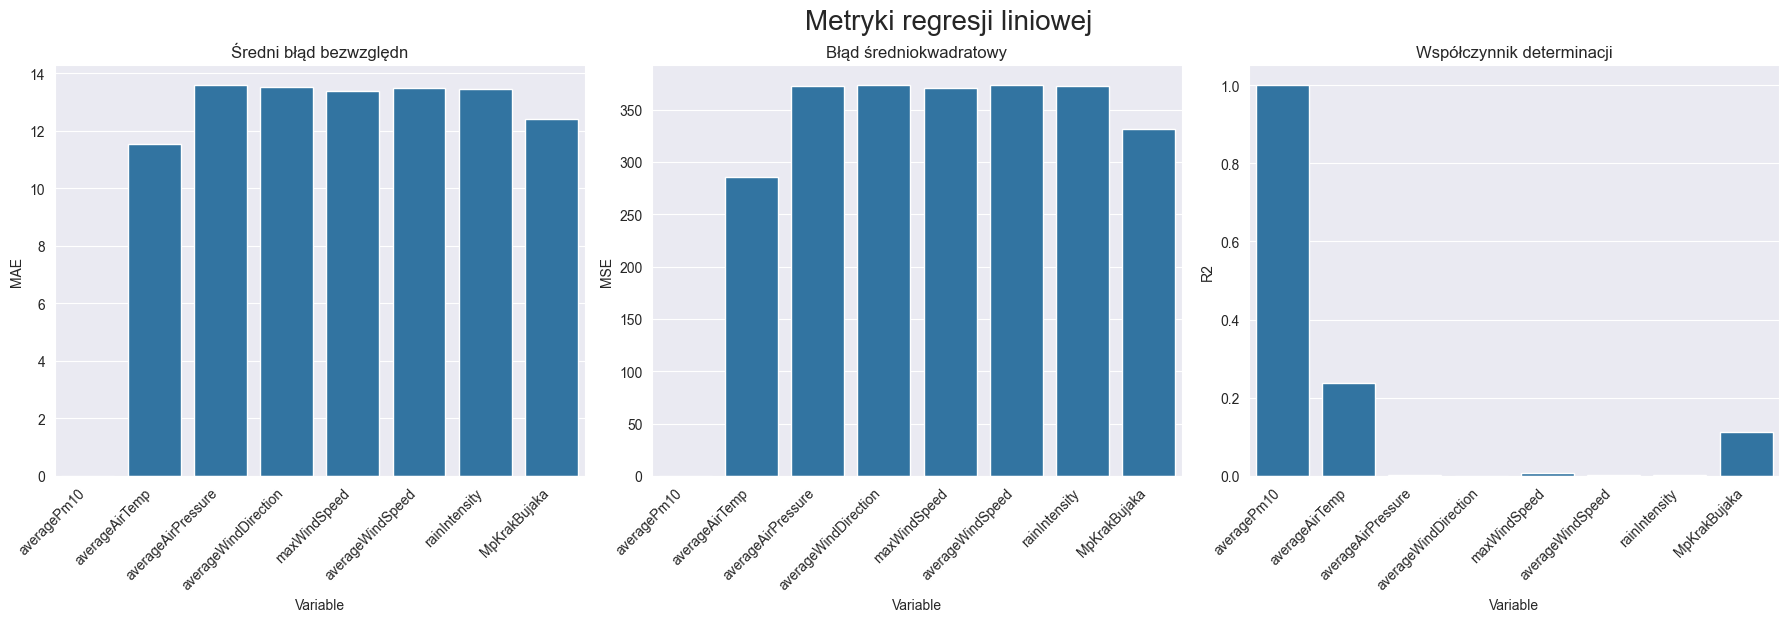

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Variable', y='MAE', data=results, ax=axs[0])
axs[0].set_title('Średni błąd bezwzględn')
axs[0].set_xticks(range(len(results['Variable'])))
axs[0].set_xticklabels(results['Variable'], rotation=45, ha='right')

sns.barplot(x='Variable', y='MSE', data=results, ax=axs[1])
axs[1].set_title('Błąd średniokwadratowy')
axs[1].set_xticks(range(len(results['Variable'])))
axs[1].set_xticklabels(results['Variable'], rotation=45, ha='right')

sns.barplot(x='Variable', y='R2', data=results, ax=axs[2])
axs[2].set_title('Współczynnik determinacji')
axs[2].set_xticks(range(len(results['Variable'])))
axs[2].set_xticklabels(results['Variable'], rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Metryki regresji liniowej', y=1.03, x=0.53, size=20)
plt.show()

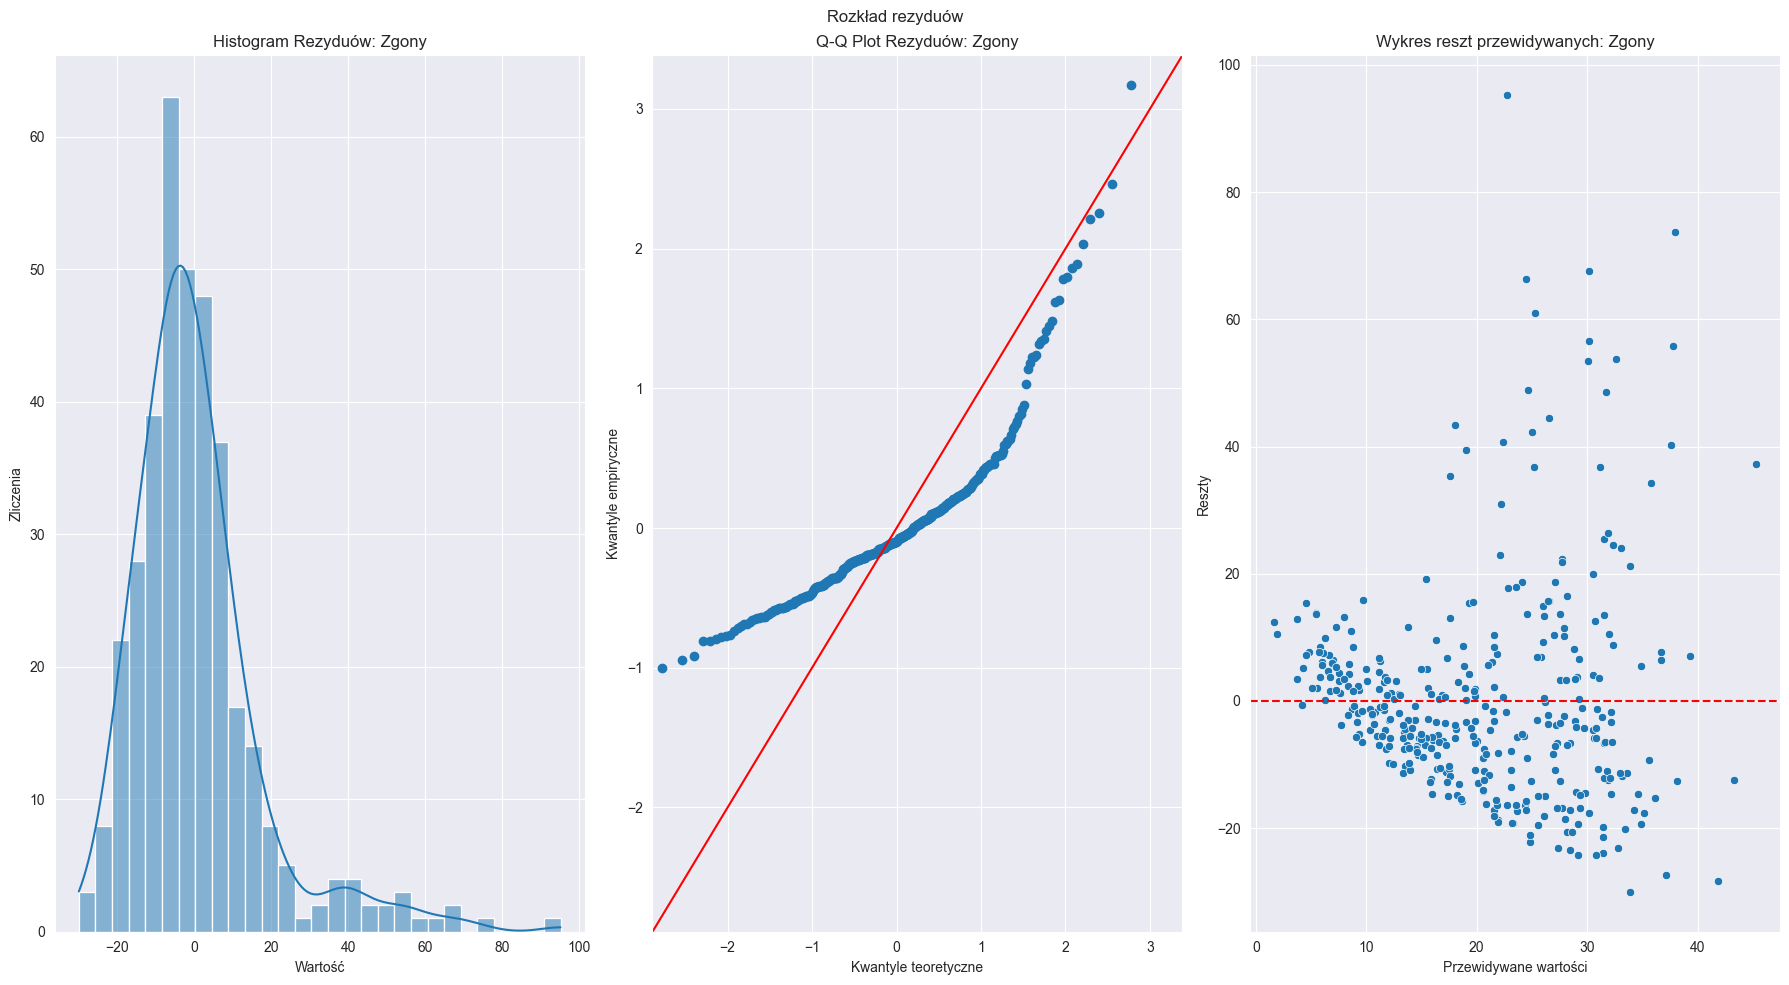

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10))

residuals = results[results['Variable'] == 'averageAirTemp'].residuals.values[0]
y_pred_pm10 = results[results['Variable'] == 'averageAirTemp'].y_pred.values[0]

sns.histplot(residuals, kde=True, ax=axs[0])
axs[0].set_title(f'Histogram Rezyduów: Zgony')
axs[0].set_xlabel('Wartość')
axs[0].set_ylabel('Zliczenia')

sm.qqplot(residuals/30, line='45', ax=axs[1])
axs[1].set_title(f'Q-Q Plot Rezyduów: Zgony')
axs[1].set_xlabel('Kwantyle teoretyczne')
axs[1].set_ylabel('Kwantyle empiryczne')

sns.scatterplot(x=y_pred_pm10, y=residuals, ax=axs[2])
axs[2].axhline(0, ls='--', color='red')
axs[2].set_title(f'Wykres reszt przewidywanych: Zgony')
axs[2].set_xlabel('Przewidywane wartości')
axs[2].set_ylabel('Reszty')

plt.suptitle('Rozkład rezyduów')
plt.tight_layout()
plt.show()